### til að laga dataframe þannig að hann keyri á þár þarf að uppfæra method í klasanum þannig að 
- skipta einföldum gæasalöppum út fyrir tvölaldar: str(inv_input['extra_params'].iloc[0]).replace("'", '"' )  
- uppfæra extra params dálkin m.v. punktinn hér fyrir ofan: inv_input['extra_params'] = json_text

## Lesum inn nauðysnlega pakka

In [ ]:
import sqlalchemy
import pandas as pd
import random
import numpy as np
import inventory_simulator as invsim
import datetime as dt



## Náum í gögn úr sqlite og getum ready fyrir simulatoir

In [ ]:
import sqlite3
conn = sqlite3.connect('quick_analysis.db')
cursor = conn.cursor()
cursor.execute('SELECT * FROM v_inv_sim_input')
rows = cursor.fetchall()
conn.close


## Hér keyrum við simulatorinn

In [ ]:

inv_sim_input = pd.DataFrame(rows) 

#2.. renamum dálka to sameinum extra params 2 og extra params 2 í 1 dálk

inv_sim_input["extra_params"] = inv_sim_input[5] + inv_sim_input[6]
inv_sim_input = inv_sim_input.drop(inv_sim_input.columns[[5,6]], axis=1) 
inv_sim_input.rename(columns={0: 'item_id', 1: 'day', 2:'forecast', 3:'actual_sale', 4: 'order_day', 7:'delivery'}, inplace=True)



In [ ]:
#inv_sim_input = inv_sim_input[inv_sim_input.item_id in ['PS870B2', 'AS43003-908']]

new_inv_sim_input = inv_sim_input[inv_sim_input.item_id.isin(['PS870B2'])]
new_inv_sim_input = new_inv_sim_input.reset_index() 

new_inv_sim_input['extra_params']



In [ ]:
from datetime import datetime
start_time = datetime.now()
print(start_time)

#3.. Keyrum simulatorinn
print('gögn sett í dataframe og keyrsla á simulator hefst')
dataframe_result = invsim.run_inventory_simulator(new_inv_sim_input)



end_time = datetime.now()
print(end_time)
print((end_time-start_time)*1000)

In [ ]:
new_inv_sim_input.sort_values(by='forecast', ascending=False)


new_inv_sim_input['extra_params'][0]

In [ ]:
dataframe_result.sort_values(by='inv', ascending=False)

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(new_inv_sim_input.day, new_inv_sim_input.forecast)
ax.plot(dataframe_result.sim_date, dataframe_result.inv)
ax.scatter(dataframe_result.sim_date, dataframe_result.deliveries)


plt.show()

dataframe_result

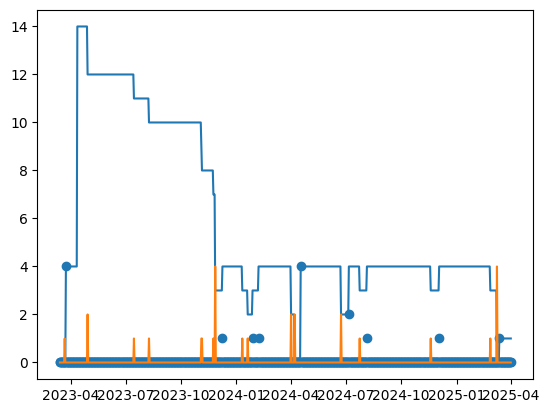

lost_sale    2.0
dtype: float64


,index,item_id,day,forecast,actual_sale,order_day,delivery,extra_params
0,0,BACJ40E20-40,2023-03-14,0.0,-1000001.0,1,0.0,"{""extra_params"": [{""current_inventory"": ""[[100..."
1,1,BACJ40E20-40,2023-03-15,0.0,-1000001.0,0,0.0,"{""extra_params"": [{""current_inventory"": ""[[100..."
2,2,BACJ40E20-40,2023-03-16,0.0,-1000001.0,0,0.0,"{""extra_params"": [{""current_inventory"": ""[[100..."
3,3,BACJ40E20-40,2023-03-17,0.0,-1000001.0,0,0.0,"{""extra_params"": [{""current_inventory"": ""[[100..."
4,4,BACJ40E20-40,2023-03-18,0.0,-1000001.0,0,0.0,"{""extra_params"": [{""current_inventory"": ""[[100..."
5,5,BACJ40E20-40,2023-03-19,0.0,-1000001.0,0,0.0,"{""extra_params"": [{""current_inventory"": ""[[100..."
6,6,BACJ40E20-40,2023-03-20,0.0,-1000001.0,0,0.0,"{""extra_params"": [{""current_inventory"": ""[[100..."
7,7,BACJ40E20-40,2023-03-21,0.0,-1000001.0,0,0.0,"{""extra_params"": [{""current_inventory"": ""[[100..."
8,8,BACJ40E20-40,2023-03-22,1.0,-1000001.0,0,0.0,"{""extra_params"": [{""current_inventory"": ""[[100..."
9,9,BACJ40E20-40,2023-03-23,0.0,-1000001.0,0,0.0,"{""extra_params"": [{""current_inventory"": ""[[100..."


In [1]:
import inventory_opt_and_forecasting_package  as inv
import numpy as np
import pandas as pd
import random
import numpy as np
import datetime as dt
import json

inp_data = inv.get_raw_data()

#pn = 'PS870B2'
pn = 'BACJ40E20-40'
sim_input_his = inp_data.create_rio_his_test_data(pn)



sim_rio_items = inp_data.create_rio_items_test_data(pn).reset_index()
sim_rio_on_order = inp_data.create_on_order_test_data(pn)
periods = 750
number_of_trials = 1000
serv_level = 0.97
sim_rio_items.at[0,'buy_freq']= 10
sim_rio_items.at[0,'del_time']=10


inv_sim = inv.inventory_simulator_with_input_prep(sim_input_his, sim_rio_items, sim_rio_on_order, periods, number_of_trials, serv_level)

import matplotlib.pyplot as plt

fig, ax = plt.subplots()


#ax.plot(dataframe_result.sim_date, dataframe_result.inv)
ax.plot(inv_sim.sim_result.sim_date, inv_sim.sim_result.inv)
ax.plot(inv_sim.sim_result.sim_date, inv_sim.sim_result.forecast)
ax.scatter(inv_sim.sim_result.sim_date, inv_sim.sim_result.deliveries)

plt.show()

#inv_sim.as_is_info
inv_sim.sim_result

print(inv_sim.sim_result[['lost_sale']].sum())

inv_sim.simulator_input_his.head(50)

### Plotly graph
1.  Ná í birgðaþróun sem area plot
2.  Ná í spá sem línurit
3.  Ná í delivery sem súlur

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

df = inv_sim.sim_result[['sim_date', 'inv']]
df2 = inv_sim.sim_result[['sim_date', 'forecast']]
df3 = inv_sim.sim_result[['sim_date', 'deliveries']]



fig = px.area(x=df.iloc[:,0], y=df.iloc[:,1], color_discrete_sequence=['blue'])
fig.add_trace(px.line(df2, x='sim_date', y='forecast', color_discrete_sequence=['red']).data[0])
fig.add_trace(px.line(df3, x='sim_date', y='deliveries', color_discrete_sequence=['green']).data[0])


fig.show()

In [ ]:
import plotly.offline as pyo

def plotly_sim_result():
    trace0 = go.Scatter(x=inv_sim.sim_result['sim_date'], y=inv_sim.sim_result['inv'], mode='lines', fill='tozeroy', marker_color='blue' )
    trace1 = go.Bar(x=inv_sim.sim_result['sim_date'], y=inv_sim.sim_result['forecast'], marker_color='red' )
    trace2 = go.Bar(x=inv_sim.sim_result['sim_date'], y=inv_sim.sim_result['deliveries'], marker_color='green' )
    trace3 = go.Bar(x=sim_input_his['day'], y=sim_input_his['actual_sale'], marker_color='blue' )


    data = [trace0, trace1, trace2, trace3]

    layout = go.Layout(title = 'Simulator result')

    fig = go.Figure(data = data, layout = layout)

    pyo.plot(fig)

In [ ]:
sim_input_his
plotly_sim_result()

In [5]:
inv_sim.sim_result['purchase_qty'][0]

4